# Ford GoBike System Data Exploration
## By Rahal Mehdi Abdelaziz

# I. Data Wrangling

> This dataset contains bike trip informations from june 2019 to may 2020 (a whole year).
Each trip is anonymized and includes:<br>

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### 1. Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df_19_06 = pd.read_csv("data/201906-baywheels-tripdata.csv")
df_19_07 = pd.read_csv("data/201907-baywheels-tripdata.csv")
df_19_08 = pd.read_csv("data/201908-baywheels-tripdata.csv")
df_19_09 = pd.read_csv("data/201909-baywheels-tripdata.csv")
df_19_10 = pd.read_csv("data/201910-baywheels-tripdata.csv")
df_19_11 = pd.read_csv("data/201911-baywheels-tripdata.csv")
df_19_12 = pd.read_csv("data/201912-baywheels-tripdata.csv")
df_20_01 = pd.read_csv("data/202001-baywheels-tripdata.csv")
df_20_02 = pd.read_csv("data/202002-baywheels-tripdata.csv")
df_20_03 = pd.read_csv("data/202003-baywheels-tripdata.csv")
df_20_04 = pd.read_csv("data/202004-baywheels-tripdata.csv")
df_20_05 = pd.read_csv("data/202005-baywheels-tripdata.csv")

C:\Users\H.E.S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\H.E.S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\H.E.S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First those DataFrame will be combined into two DataFrames because of difference of format before and after 04-2020  
* df_1 before 04-20
* df_2 after 04-20

In [3]:
df_1 = pd.concat([df_19_06, df_19_07, df_19_08, df_19_09, df_19_10 , df_19_11, df_19_12, df_20_01, df_20_02, df_20_03], ignore_index = True, sort= False)
df_1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,81695,2019-06-30 18:16:09.7730,2019-07-01 16:57:45.5920,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,-122.427317,1502,Subscriber,No,NaN
1,74260,2019-06-30 18:09:55.8300,2019-07-01 14:47:36.6810,50.0,2nd St at Townsend St,37.780526,-122.390288,101.0,15th St at Potrero Ave,37.767079,-122.407359,2526,Customer,No,NaN
2,59603,2019-06-30 15:40:31.0380,2019-07-01 08:13:54.3490,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2427,Subscriber,No,NaN
3,67932,2019-06-30 12:49:47.7810,2019-07-01 07:42:00.5430,169.0,Bushrod Park,37.846516,-122.265304,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,1261,Customer,No,NaN
4,48894,2019-06-30 17:21:00.0550,2019-07-01 06:55:54.9960,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1070,Customer,No,NaN


In [4]:
df_2 = pd.concat([df_20_04, df_20_05], ignore_index = True, sort= False)
df_2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual,NaN
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual,NaN
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual,NaN
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual,NaN
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual,NaN


### 2. Assessing Data

In [5]:
df_19_06.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,81695,2019-06-30 18:16:09.7730,2019-07-01 16:57:45.5920,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,-122.427317,1502,Subscriber,No,NaN


In [6]:
df_19_07.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,85457,2019-07-31 09:25:37.3410,2019-08-01 09:09:54.6000,36.0,Folsom St at 3rd St,37.78383,-122.39887,344.0,16th St Depot,37.766349,-122.396292,3491,Customer,No,NaN


In [7]:
df_19_08.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.2530,2019-09-01 16:23:27.4920,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No


In [8]:
df_19_09.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No


In [9]:
df_19_10.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,62337,2019-10-31 16:25:01.5970,2019-11-01 09:43:59.0290,148,Horton St at 40th St,37.829705,-122.28761,385,Woolsey St at Sacramento St,37.850578,-122.278175,12222,Customer,No


In [10]:
df_19_11.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,707,2019-11-30 23:54:47.2970,2019-12-01 00:06:34.3780,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,12077,Customer,No,NaN


In [11]:
df_19_12.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,37.772,-122.38997,349.0,Howard St at Mary St,37.78101,-122.405666,12085,Customer,NaN


In [12]:
df_20_01.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN


In [13]:
df_20_02.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.82841,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN


In [14]:
df_20_03.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN


In [15]:
df_20_04.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual


In [16]:
df_20_05.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False


In [17]:
df_1.shape

(2358923, 15)

In [18]:
df_1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,81695,2019-06-30 18:16:09.7730,2019-07-01 16:57:45.5920,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,-122.427317,1502,Subscriber,No,NaN
1,74260,2019-06-30 18:09:55.8300,2019-07-01 14:47:36.6810,50.0,2nd St at Townsend St,37.780526,-122.390288,101.0,15th St at Potrero Ave,37.767079,-122.407359,2526,Customer,No,NaN
2,59603,2019-06-30 15:40:31.0380,2019-07-01 08:13:54.3490,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2427,Subscriber,No,NaN
3,67932,2019-06-30 12:49:47.7810,2019-07-01 07:42:00.5430,169.0,Bushrod Park,37.846516,-122.265304,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,1261,Customer,No,NaN
4,48894,2019-06-30 17:21:00.0550,2019-07-01 06:55:54.9960,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1070,Customer,No,NaN


In [19]:
df_1.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
2358918,61,2020-04-01 10:42:35,2020-04-01 10:43:37,NaN,NaN,37.848493,-122.265797,NaN,NaN,37.848476,-122.265779,999960,Subscriber,NaN,app
2358919,78,2020-03-18 17:10:42,2020-03-18 17:12:01,NaN,NaN,37.848499,-122.265794,NaN,NaN,37.848477,-122.265815,999960,Subscriber,NaN,app
2358920,122,2020-04-01 13:32:28,2020-04-01 13:34:31,NaN,NaN,37.848507,-122.266010,NaN,NaN,37.848485,-122.266063,633095,Subscriber,NaN,app
2358921,340,2020-04-01 13:07:34,2020-04-01 13:13:14,NaN,NaN,37.848530,-122.266013,NaN,NaN,37.848497,-122.266029,633095,Subscriber,NaN,app
2358922,333,2020-03-23 16:39:57,2020-03-23 16:45:30,NaN,NaN,37.848625,-122.266660,NaN,NaN,37.848446,-122.266022,633095,Subscriber,NaN,app


In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358923 entries, 0 to 2358922
Data columns (total 15 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(6), int64(2), object(7)
memory usage: 270.0+ MB


In [21]:
df_1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.358923e+06,1.792632e+06,2.358923e+06,2.358923e+06,1.790984e+06,2.358923e+06,2.358923e+06,2.358923e+06
mean,8.199436e+02,1.574262e+02,3.775627e+01,-1.223510e+02,1.516126e+02,3.775540e+01,-1.223470e+02,1.603747e+05
std,1.895830e+03,1.327526e+02,1.866724e-01,4.990514e-01,1.315672e+02,2.711204e-01,8.093404e-01,2.657013e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00
25%,3.720000e+02,5.000000e+01,3.776704e+01,-1.224174e+02,4.300000e+01,3.776710e+01,-1.224152e+02,2.677000e+03
50%,5.930000e+02,1.120000e+02,3.777874e+01,-1.224008e+02,1.050000e+02,3.777874e+01,-1.223997e+02,1.048300e+04
75%,9.220000e+02,2.500000e+02,3.779413e+01,-1.223903e+02,2.450000e+02,3.779421e+01,-1.223903e+02,2.639950e+05
max,9.121100e+05,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.999600e+05


In [22]:
df_1.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
bike_share_for_all_trip     True
rental_access_method        True
dtype: bool

In [23]:
df_1.duplicated().sum()

7512

In [24]:
df_2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual,NaN
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual,NaN
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual,NaN
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual,NaN
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual,NaN


In [25]:
df_2.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
222505,BACC41F140A7114A,electric_bike,2020-05-10 17:26:19,2020-05-10 17:46:18,Funston Ave at Fulton St,485.0,Dolores St at 15th St,96.0,37.7734,-122.4713,37.7662,-122.4267,casual,False
222506,64F4C06CB79B6205,electric_bike,2020-05-30 17:40:19,2020-05-30 17:47:50,NaN,NaN,NaN,NaN,37.7516,-122.4309,37.7353,-122.4227,casual,False
222507,C38F43B3BF11399F,electric_bike,2020-05-31 12:34:41,2020-05-31 14:42:32,Broderick St at Oak St,71.0,NaN,NaN,37.7730,-122.4391,37.7974,-122.4331,casual,False
222508,9C53113CA86194C5,electric_bike,2020-05-30 17:27:57,2020-05-30 17:46:56,NaN,NaN,NaN,NaN,37.7883,-122.4090,37.7591,-122.4253,casual,False
222509,6E047EDBF933A50B,electric_bike,2020-05-31 13:49:41,2020-05-31 14:10:56,NaN,NaN,NaN,NaN,37.7909,-122.4392,37.7909,-122.4393,casual,False


In [26]:
df_2.duplicated().sum()

0

In [27]:
df_2.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,140749.000000,136637.000000,222510.000000,222510.000000,222144.000000,222144.000000
mean,227.044235,224.284945,37.716545,-122.334165,37.716465,-122.334461
std,169.054946,168.777124,0.158375,0.189933,0.158411,0.190124
min,3.000000,3.000000,37.239200,-122.514300,37.004600,-122.559000
25%,74.000000,74.000000,37.759100,-122.432400,37.759100,-122.432300
50%,180.000000,171.000000,37.773500,-122.411600,37.773500,-122.411700
75%,383.000000,381.000000,37.787300,-122.388100,37.787400,-122.388100
max,521.000000,521.000000,37.880200,-121.774600,37.962100,-121.560600


#### Quality issues

1. Columns names in df_1 and df_2 doesn't match 

    * df_1: duration_sec -------------- df_2: None
    * df_1: user_type ----------------- df_2: member_casual
    * df_1: bike_id ------------------- df_2: ride_id       
    * df_1: start_time ---------------- df_2: started_at
    * df_1: end_time ------------------ df_2: ended_at
    * df_1: start_station_longitude --- df_2: start_lng
    * df_1: start_station_latitude ---- df_2: start_lat
    * df_1: end_station_latitude ------ df_2: end_lat
    * df_1: end_station_longitude ----- df_2: end_lng
    
2. user_type values in df_1 doesn't match with member_casual values in df_2
    
3. erronious datatype 

- df_1:

    * trip duration     (should be time)
    * started_at        (should be date_time)
    * ended_at          (should be date_time)
    * start_station_id  (should be string)
    * end_station_id    (should be string) 
    * bike_ride_id      (should be string)
    * member_casual     (should be category)
    

- df_2:

    * bike_ride_id      (should be string)
    * started_at        (should be date_time)
    * ended_at          (should be date_time)  
    * start_station_id  (should be string)
    * end_station_id    (should be string)         
    * member_casual     (should be category)
    
4. Negative trip_duration values in df_2_clean ( nb: this issue will be solved once the trip_duration columns is created for df_2 the tidiness issues phase)
5. The trip duration is in second wich is better to convert to minutes
6. Colums aren't well ordered

( nb: issue 4 and 5 will be solved once the trip_duration columns is created for df_2 and df_1 and df_2 are contaconated in the tidiness issues phase)

#### Tidiness issues


1. Some columns are useless for different reason

    * rental_access_method (df_1) : exists only on 06/19, 07/19 and 10/19
    * bike_share_for_all_trip (df_1) : doesn't exist after 03/20
    * is_equity (df_2) :  exists only on 05/20
    * rideable_type (df_2) : exists only after 03/20 
    
    
2. There are some duplicated rows in df_1

3. A trip_duration column is missing in df_2
4. df_1 and df_2 should be concatenated


### 3. Cleaning Data

First a  copy of each dataframe will be made

In [28]:
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()

#### Quality issues

1. Columns names in df_1 and df_2 doesn't match 

    * df_1: duration_sec -------------- df_2: None
    * df_1: user_type ----------------- df_2: member_casual
    * df_1: bike_id -------------------- df_2: ride_id       
    * df_1: start_time ----------------- df_2: started_at
    * df_1: end_time ------------------ df_2: ended_at
    * df_1: start_station_longitude --- df_2: start_lng
    * df_1: start_station_latitude ----- df_2: start_lat
    * df_1: end_station_latitude ------- df_2: end_lat
    * df_1: end_station_longitude ----- df_2: end_lng

**Define**

- Column name in df_1 will be changed as follow

    * user_type to member_casual
    * bike_id to bike_ride_id ( this column will contain the bike_id or the ride_id )
    * start_time to started_at
    * end_time to ended_at
    * start_station_longitude to start_lng
    * start_station_latitude to start_lat
    * end_station_latitude to end_lat
    * end_station_longitude to end_lng
    
- ride_id column name in df_2 will be changed as bike_ride_id

**Code**

In [29]:
df_1_clean = df_1_clean.rename(columns={'duration_sec':'trip_duration', 'user_type':'member_casual', 'bike_id':'bike_ride_id', 'start_time':'started_at', \
                                       'end_time':'ended_at', 'start_station_longitude':'start_lng', 'start_station_latitude':'start_lat', \
                                        'end_station_latitude':'end_lat', 'end_station_longitude':'end_lng'})
df_2_clean = df_2_clean.rename(columns={'ride_id':'bike_ride_id'})

**Test**

df_1_clean.info()

2. user_type values in df_1 doesn't match with member_casual values in df_2


**Define**

Change values of member_casual column 

    * Subscriber to member
    * Customer to casual

**Code**

In [30]:
df_1_clean = df_1_clean.replace({'Subscriber':'member', 'Customer':'casual'})

**Test**

In [31]:
df_2_clean.member_casual.unique()

array(['casual', 'member'], dtype=object)

3. erronious datatype 

- df_1:

    * trip duration     (should be time)
    * started_at        (should be date_time)
    * ended_at          (should be date_time)
    * start_station_id  (should be string)
    * end_station_id    (should be string) 
    * bike_ride_id      (should be string)
    * member_casual     (should be category)
    

- df_2:

    * bike_ride_id      (should be string)
    * started_at        (should be date_time)
    * ended_at          (should be date_time)  
    * start_station_id  (should be string)
    * end_station_id    (should be string)         
    * member_casual     (should be category)
    

**Define**

- Set datatypes in df_1 as follow

    * started_at       :    date_time
    * ended_at         :    date_time
    * start_station_id :    string
    * bike_ride_id     :    string
    * member_casual    :    category
    
    
- Set datatype in df_2 as follow

    * trip_duration :    time     # This one will be set after setting the trip_duration column in tidiness cleaning
    * bike_ride_id  :    string
    * started_at    :    date_time
    * ended_at      :    date_time
    * member_casual :    category   

**Code**

In [32]:
# set df_1 datatypes
df_1_clean.started_at = df_1_clean.started_at.astype('datetime64')
df_1_clean.ended_at = df_1_clean.ended_at.astype('datetime64')
df_1_clean.start_station_id = df_1_clean.start_station_id.astype('str')
df_1_clean.end_station_id = df_1_clean.end_station_id.astype('str')
df_1_clean.bike_ride_id = df_1_clean.bike_ride_id.astype('str')
df_1_clean.member_casual = df_1_clean.member_casual.astype('category')

In [33]:
# set df_2 datatypes
df_2_clean.started_at = df_2_clean.started_at.astype('datetime64')
df_2_clean.ended_at = df_2_clean.ended_at.astype('datetime64')
df_2_clean.start_station_id = df_2_clean.start_station_id.astype('str')
df_2_clean.end_station_id = df_2_clean.end_station_id.astype('str')
df_2_clean.member_casual = df_2_clean.member_casual.astype('category')

**Test**

In [34]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358923 entries, 0 to 2358922
Data columns (total 15 columns):
trip_duration              int64
started_at                 datetime64[ns]
ended_at                   datetime64[ns]
start_station_id           object
start_station_name         object
start_lat                  float64
start_lng                  float64
end_station_id             object
end_station_name           object
end_lat                    float64
end_lng                    float64
bike_ride_id               object
member_casual              category
bike_share_for_all_trip    object
rental_access_method       object
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(7)
memory usage: 254.2+ MB


In [35]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222510 entries, 0 to 222509
Data columns (total 14 columns):
bike_ride_id          222510 non-null object
rideable_type         222510 non-null object
started_at            222510 non-null datetime64[ns]
ended_at              222510 non-null datetime64[ns]
start_station_name    140749 non-null object
start_station_id      222510 non-null object
end_station_name      136637 non-null object
end_station_id        222510 non-null object
start_lat             222510 non-null float64
start_lng             222510 non-null float64
end_lat               222144 non-null float64
end_lng               222144 non-null float64
member_casual         222510 non-null category
is_equity             138251 non-null object
dtypes: category(1), datetime64[ns](2), float64(4), object(7)
memory usage: 22.3+ MB


1. Some columns are useless for different reasons

    * rental_access_method (df_1) : exists only on 06/19, 07/19 and 10/19
    * bike_share_for_all_trip (df_1) : doesn't exist after 03/20
    * is_equity (df_2) :  exists only on 05/20
    * rideable_type (df_2) : exists only after 03/20 

**Define**

1. Drop usless columns

    * rental_access_method (df_1)
    * bike_share_for_all_trip (df_1)
    * is_equity (df_2) 
    * rideable_type (df_2)

**Code**

In [36]:
df_1_clean = df_1_clean.drop(columns=['rental_access_method', 'bike_share_for_all_trip'])
df_2_clean = df_2_clean.drop(columns=['is_equity', 'rideable_type'])

**Test**

In [37]:
print(df_1_clean.info());
print(df_2_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358923 entries, 0 to 2358922
Data columns (total 13 columns):
trip_duration         int64
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_id      object
start_station_name    object
start_lat             float64
start_lng             float64
end_station_id        object
end_station_name      object
end_lat               float64
end_lng               float64
bike_ride_id          object
member_casual         category
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 218.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222510 entries, 0 to 222509
Data columns (total 12 columns):
bike_ride_id          222510 non-null object
started_at            222510 non-null datetime64[ns]
ended_at              222510 non-null datetime64[ns]
start_station_name    140749 non-null object
start_station_id      222510 non-null object
end_station_name      136637 non-nul

2. There are some duplicated rows in df_1

**Define**

drop duplicated rows in df_1

**Code**

In [38]:
df_1_clean = df_1_clean.drop_duplicates()

**Test**

In [39]:
sum(df_1_clean.duplicated())

0

3. A trip_duration column is missing in df_2


**Define**

Set a trip_duration column in df_2

**Code**

In [40]:
# trip_duration equal to end time minus started time
df_2_clean['trip_duration'] = df_2_clean['ended_at'] - df_2_clean['started_at']

# convert trip duration to second
import datetime as dt
df_2_clean['trip_duration'] = df_2_clean['trip_duration'].dt.total_seconds()

# convert trip duration datatype to int
df_2_clean['trip_duration'] = df_2_clean['trip_duration'].astype(int)

**Test**

In [41]:
print(df_2_clean.head())
print(df_2_clean.info())

       bike_ride_id          started_at            ended_at  \
0  5A1FF31692371859 2020-04-04 08:28:20 2020-04-04 08:33:34   
1  D8D5BA2D4F051133 2020-04-03 18:55:43 2020-04-03 19:21:05   
2  A3633A9140CA4FF8 2020-04-04 15:11:04 2020-04-04 15:12:21   
3  301F57EB0197A5E0 2020-04-03 20:21:03 2020-04-03 22:08:06   
4  9429C701AF5744B3 2020-04-03 18:39:39 2020-04-03 18:47:19   

     start_station_name start_station_id end_station_name end_station_id  \
0                   NaN              nan              NaN            nan   
1                   NaN              nan              NaN            nan   
2                   NaN              nan              NaN            nan   
3  8th St at Ringold St             60.0              NaN            nan   
4                   NaN              nan              NaN            nan   

   start_lat  start_lng  end_lat   end_lng member_casual  trip_duration  
0    37.7692  -122.4209  37.7703 -122.4069        casual            314  
1    37.8023  -1

In [42]:
df_2_clean.describe()

,start_lat,start_lng,end_lat,end_lng,trip_duration
count,222510.000000,222510.000000,222144.000000,222144.000000,2.225100e+05
mean,37.716545,-122.334165,37.716465,-122.334461,1.863942e+03
std,0.158375,0.189933,0.158411,0.190124,2.585972e+04
min,37.239200,-122.514300,37.004600,-122.559000,-9.200000e+01
25%,37.759100,-122.432400,37.759100,-122.432300,4.280000e+02
50%,37.773500,-122.411600,37.773500,-122.411700,8.120000e+02
75%,37.787300,-122.388100,37.787400,-122.388100,1.575000e+03
max,37.880200,-121.774600,37.962100,-121.560600,3.283732e+06


**Nb: negative values on the trip_duration column**

4. df_1 and df_2 should be concatenated

**Define**

Concatenate df_1_clean and df_2_clean

**Code**

In [43]:
df_clean = pd.concat([df_1_clean, df_2_clean])

C:\Users\H.E.S\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


**Test**

In [44]:
print(df_1_clean.shape[0])
print(df_2_clean.shape[0])
print(df_clean.shape[0])

2351411
222510
2573921


#### Quality issues

4. Negative trip_duration values in df_2_clean ( nb: this issue will be solved once the trip_duration columns is created for df_2 the tidiness issues phase)

**Define**

Delete rows with negative trip_duration values. <br>
This decision is token because a negative trip_duration value means a false started_at or ended_at value wich are the main features in this exploration  

**Code**

In [45]:
df_clean = df_clean[df_clean['trip_duration']>0]

**Test**

In [46]:
df_clean[df_clean['trip_duration']<0].shape[0]

0

5. The trip duration unit is second wich is better to convert to minute


**Define**

Convert trip duration to minute

**Code**

In [47]:
df_clean['trip_duration'].describe()

count    2.573582e+06
mean     9.101323e+02
std      7.822666e+03
min      1.000000e+00
25%      3.760000e+02
50%      6.040000e+02
75%      9.550000e+02
max      3.283732e+06
Name: trip_duration, dtype: float64

In [48]:
df_clean['trip_duration'] = df_clean['trip_duration']/60

**Test**

In [49]:
df_clean['trip_duration'].describe()

count    2.573582e+06
mean     1.516887e+01
std      1.303778e+02
min      1.666667e-02
25%      6.266667e+00
50%      1.006667e+01
75%      1.591667e+01
max      5.472887e+04
Name: trip_duration, dtype: float64

6. Colums aren't well ordered


**Define**

Order columns

**Code**

In [50]:
headers = ['bike_ride_id', 'member_casual', 'started_at', 'ended_at', 'trip_duration', 'start_station_name', 'start_station_id', 'start_lat', 'start_lng', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng']
df_clean = df_clean[headers]

**Test**

In [51]:
df_clean.head()

,bike_ride_id,member_casual,started_at,ended_at,trip_duration,start_station_name,start_station_id,start_lat,start_lng,end_station_name,end_station_id,end_lat,end_lng
0,1502,member,2019-06-30 18:16:09.773,2019-07-01 16:57:45.592,1361.583333,17th St at Valencia St,109.0,37.763316,-122.421904,Koshland Park,56.0,37.773414,-122.427317
1,2526,casual,2019-06-30 18:09:55.830,2019-07-01 14:47:36.681,1237.666667,2nd St at Townsend St,50.0,37.780526,-122.390288,15th St at Potrero Ave,101.0,37.767079,-122.407359
2,2427,member,2019-06-30 15:40:31.038,2019-07-01 08:13:54.349,993.383333,The Embarcadero at Steuart St,23.0,37.791464,-122.391034,San Francisco Caltrain (Townsend St at 4th St),30.0,37.776598,-122.395282
3,1261,casual,2019-06-30 12:49:47.781,2019-07-01 07:42:00.543,1132.200000,Bushrod Park,169.0,37.846516,-122.265304,Telegraph Ave at Ashby Ave,248.0,37.855956,-122.259795
4,1070,casual,2019-06-30 17:21:00.055,2019-07-01 06:55:54.996,814.900000,San Francisco Ferry Building (Harry Bridges Pl...,15.0,37.795392,-122.394203,San Francisco Caltrain (Townsend St at 4th St),30.0,37.776598,-122.395282


### 4. Storing data

In [52]:
df_clean.to_csv('ford_gobike_system.csv', index = False, header=True)


# II. Data Exploration

### Loading Data

In [53]:
dtype = {'member_casual': 'category'}            # Set member_casual as a categorical variable
parse_dates = ['started_at', 'ended_at']         # Set date variable as a datetime datatype 
df =pd.read_csv('ford_gobike_system.csv', dtype=dtype, parse_dates=parse_dates)   # import the csv respecting datatypes

C:\Users\H.E.S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### The structure of the dataset

> There are 4702822 trip on the dataset with 13 features ( trip_duration, started_at, ended_at, start_station_id, start_station_name, start_lat, start_lng, start_lng, end_station_id, end_station_name, end_lat, end_lng, bike_ride_id, member_casual ) most variables are object, the trip duration is an 'int' those related to start and end position are 'float', the start time and the end time are 'datetime', and member_casual wich is a categorical variable.

### The main features of interest in the dataset

> The main feature of interest are : trip_duration, started_at, casual_member.
> I'm aslo interseted on the month, the weekday and the daytime of the trip, that's why I'll add a column for each one.  

### Susceptible features to help support the investigation into features of interest

> The started_at and the trip_duration should help support the investigation.

In [54]:
# Creating daytime, weekday and month columns

df['month'] = pd.to_datetime(df['started_at']).dt.to_period('M')
df['weekday'] = df['started_at'].dt.day_name()
df['daytime'] = df['started_at'].dt.hour

# Reorder the weekday values
df['weekday'] = pd.Categorical(df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)
df.head()

,bike_ride_id,member_casual,started_at,ended_at,trip_duration,start_station_name,start_station_id,start_lat,start_lng,end_station_name,end_station_id,end_lat,end_lng,month,weekday,daytime
0,1502,member,2019-06-30 18:16:09.773,2019-07-01 16:57:45.592,1361.583333,17th St at Valencia St,109.0,37.763316,-122.421904,Koshland Park,56.0,37.773414,-122.427317,2019-06,Sunday,18
1,2526,casual,2019-06-30 18:09:55.830,2019-07-01 14:47:36.681,1237.666667,2nd St at Townsend St,50.0,37.780526,-122.390288,15th St at Potrero Ave,101.0,37.767079,-122.407359,2019-06,Sunday,18
2,2427,member,2019-06-30 15:40:31.038,2019-07-01 08:13:54.349,993.383333,The Embarcadero at Steuart St,23.0,37.791464,-122.391034,San Francisco Caltrain (Townsend St at 4th St),30.0,37.776598,-122.395282,2019-06,Sunday,15
3,1261,casual,2019-06-30 12:49:47.781,2019-07-01 07:42:00.543,1132.200000,Bushrod Park,169.0,37.846516,-122.265304,Telegraph Ave at Ashby Ave,248.0,37.855956,-122.259795,2019-06,Sunday,12
4,1070,casual,2019-06-30 17:21:00.055,2019-07-01 06:55:54.996,814.900000,San Francisco Ferry Building (Harry Bridges Pl...,15.0,37.795392,-122.394203,San Francisco Caltrain (Townsend St at 4th St),30.0,37.776598,-122.395282,2019-06,Sunday,17


## Univariate Exploration

> In this section, the distributions of individual variables will be investigated. 


The trip duration

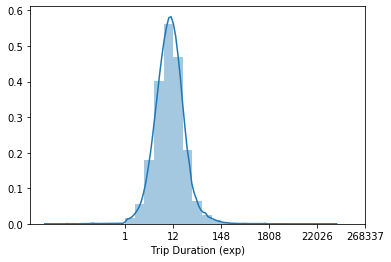

In [55]:
def exp_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.log(x)
    else:
        return np.exp(x)    

data = df['trip_duration'];
bin_edges = np.arange(0, exp_trans(data.max())+0.5, 0.5);
sb.distplot(data.apply(exp_trans), bins = bin_edges);
tick_locs = np.arange(0, exp_trans(data.max())+2.5, 2.5);
plt.xticks(tick_locs, exp_trans(tick_locs, inverse = True).astype(int));
plt.xlabel("Trip Duration (exp)");




With an exponential transformation the trip duration has a normal distribution

The **daytime** distribution


Text(0.5, 1.0, 'Daytime Distribution')

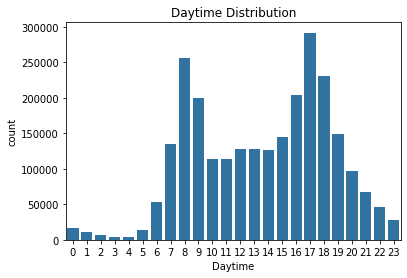

In [56]:
# Start with daytime distribution

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='daytime', color = base_color);
plt.xlabel('Daytime')
plt.title('Daytime Distribution')

We have a bimodal distribution with some observations :
* The two modes are from 08:00 to 10:00 and from 16:00 to 19:00
* The number of trips is very low between 00:00 to 06:00
* In the rest of the day the frequency is median

Text(0.5, 1.0, 'Weekday Distribution')

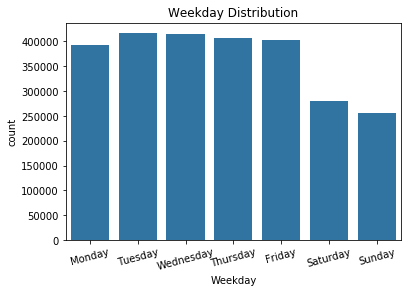

In [57]:
# The weekday distribution

sb.countplot(data=df, x='weekday', color=base_color);
plt.xticks(rotation = 15);
plt.xlabel('Weekday')
plt.title('Weekday Distribution')

The number of trip over weekdays is about the same except for the weekend when it's relatively low

Text(0.5, 1.0, 'Months Distribution')

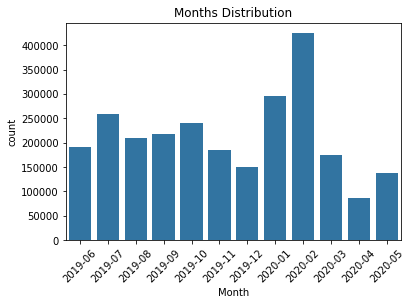

In [58]:
# The month distribution

base_color = sb.color_palette()[0];
sb.countplot(data=df, x ='month', color=base_color);
plt.xticks(rotation = 45);
plt.xlabel('Month')
plt.title('Months Distribution')

* The last month of 2019 has the lowest number of trip.   
* January and February  2020 was the period with the highest number of trips.
* April and Mai 2020 is the period with the lowest number of trips ( it coincide with the starting of the COVID-19 pandemic ).

Text(0.5, 1.0, 'Customer Type Count')

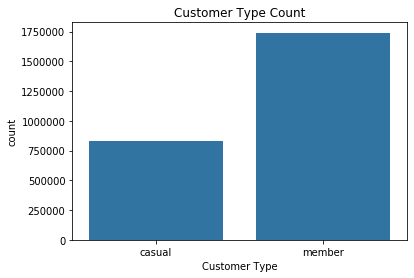

In [59]:
# number of trips regarding the customer type

sb.countplot(data=df, x='member_casual', color=base_color);
plt.xlabel("Customer Type");
plt.title('Customer Type Count')

Number of trips for members is about two times greater than for casual


#### The distribution will be discussed regarding each variable separately

     * The trip duration : Wit a exponential transformation there is a normal distribution.
     * The daytime variable : The distribution is bimodal where there is two picks : from 08 to 09 and from  17 to 18.
     * The weekday variable : Total number of trips on the weekend is less than other week days.
     * The month variable : The total number of trips decrease in the end of the year 2019, increase remarkably the begining of 2020 (January and February) and decrease again until its minimum on April then increase again
     * The member_casual variable (type of customer) : The number of trips all over the year ( from  2019-06 to 2020-05) for member customer are about two times the number for casual customer
     


> Other observation
* The number of trips is low in weekends
* The number of trips regarding months was at its max the starting of the 2020 year and decrease outstandingly on Mars, wich is caused by the coronavirus pandemic definetly.

## Bivariate Exploration
In this section some bivariate exploration will be done, the trip duration needs an exponential transformation to get an significant graphs 

The exponential transformation is already done 'exp_trans', an yticks settings are neeeded

In [60]:
# make an exponential transformation for the trip duration values
df['trip_duration_exp'] = df['trip_duration'].apply(exp_trans);

# Make a function to set the yticks
def duration_yticks():
    duration_labels = ['1mn', '10mn','2h30mn', '1j', '10j'];
    duration_ticks =[1,10,150 ,1440, 14400];        ####
    plt.yticks(exp_trans(np.array(duration_ticks)), duration_labels);
    plt.ylabel("Trip Duration");

The **trip_duration** vs **casual_member**

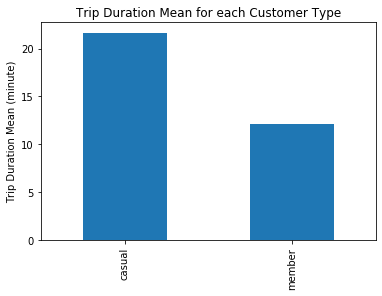

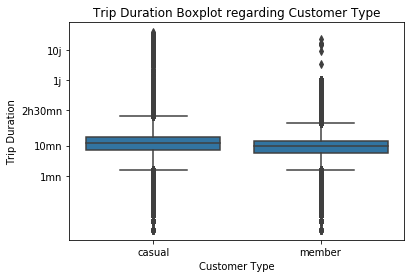

In [61]:
### plot the trip duration mean as a barchart
df[['member_casual', 'trip_duration']].groupby('member_casual').mean().plot(kind='bar', legend=None);
plt.xlabel("");
plt.ylabel('Trip Duration Mean (minute)');
plt.title('Trip Duration Mean for each Customer Type');     
plt.show();
 
    

### Plot a boxplot of the trip duration regarding the customer type
sb.boxplot(data = df, x = 'member_casual', y = 'trip_duration_exp', color = base_color);                

# set y ticks and labels
duration_yticks()  

# set the tilte andx label
plt.xlabel("Customer Type");
plt.title('Trip Duration Boxplot regarding Customer Type');     

plt.show()

* The trip_duration distribution spread is a little larger for casual type.
* The big difference in the mean is due to big number of upper outliers for casual member type.
* The boxplot needed a log transformation

trip_duration Vs daytime

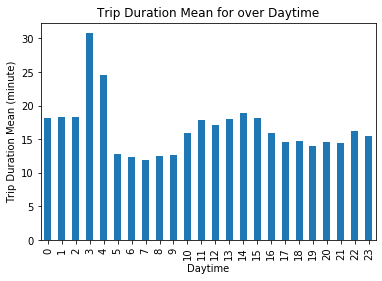

In [62]:
# Set a range from 0 to 23
hourly_ticks = np.arange(0,24,1) 

df[['daytime', 'trip_duration']].groupby('daytime').mean().plot(kind = 'bar', legend=None);
plt.xticks(hourly_ticks);
plt.ylabel('Trip Duration Mean (minute)');
plt.xlabel('Daytime');
plt.title('Trip Duration Mean for over Daytime');    

Trips starting from 03:00 to 05:00  are more susceptible to be long.

trip_duration Vs weekday

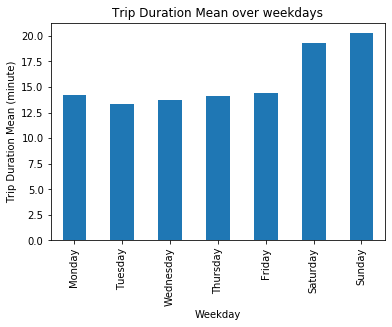

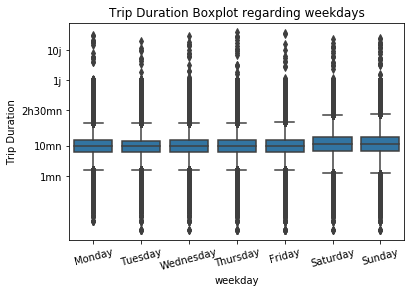

In [63]:
### Plot the trip duration mean regarding weeldays

df[['weekday', 'trip_duration']].groupby('weekday').mean().plot(kind='bar', legend=None);
plt.xlabel('Weekday');
plt.ylabel('Trip Duration Mean (minute)');
plt.title('Trip Duration Mean over weekdays') 
plt.show()


### Plot the trip duration boxplot regarding weedays
sb.boxplot(data = df, x = 'weekday', y = 'trip_duration_exp', color = base_color)

# set yticks
duration_yticks()  
# title, xticks rotaion settings
plt.title('Trip Duration Boxplot regarding weekdays') 
plt.xticks(rotation = 15)
plt.show()


The trip duration distribution is about the same over the week except for weekends the spread is few larger , and the duration is more susceptible to be long

trip_duration Vs month

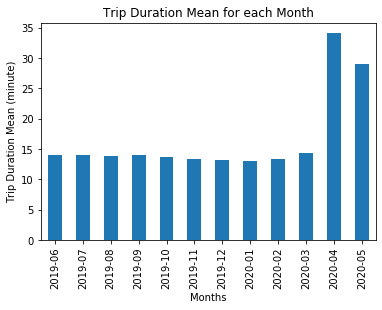

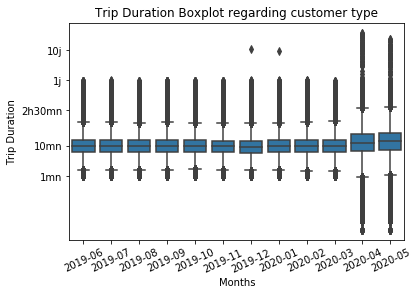

In [64]:
# Plot the trip duration mean for each months 
df[['month', 'trip_duration']].groupby('month').mean().plot(kind='bar', legend=None);
plt.xlabel('Months');
plt.ylabel('Trip Duration Mean (minute)');
plt.title('Trip Duration Mean for each Month');     

plt.show();


# Plot boxplot of the trip duration over months 
sb.boxplot(data = df, x = 'month', y = 'trip_duration_exp', color = base_color);

# set y ticks and labels
duration_yticks();
plt.xlabel('Months');
plt.title('Trip Duration Boxplot regarding customer type');     
plt.xticks(rotation = 25);


Accordong to months, the last two months the trip duration spread is larger, with a many outliers and the duration is more susceptible to long

Type of customer (customer_member) Vs daytime

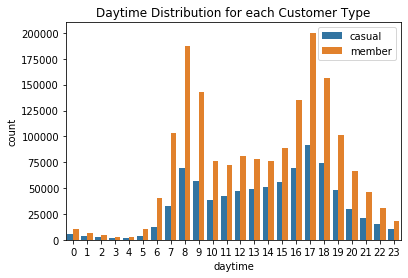

In [65]:
ax = sb.countplot(data = df, x = 'daytime', hue = 'member_casual');
ax.legend(loc = 1);
plt.title('Daytime Distribution for each Customer Type');

Type of customer (customer_member) Vs Weekday

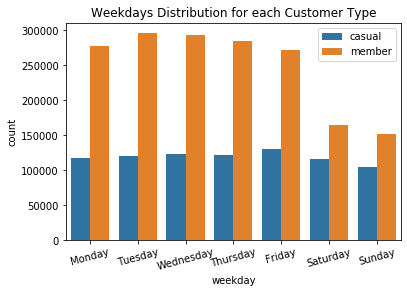

In [66]:
ax = sb.countplot(data = df, x = 'weekday', hue = 'member_casual');
ax.legend(loc = 1);
plt.xticks(rotation = 15);
plt.title('Weekdays Distribution for each Customer Type');


According to this plot, member type is the category wich influence most the weekday distribution

Type of customer (customer_member) Vs month

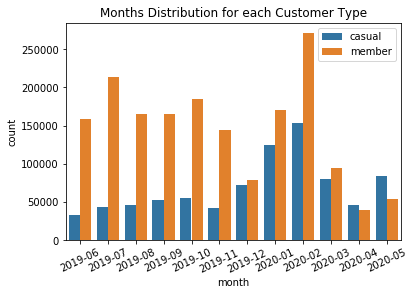

In [67]:
ax = sb.countplot(data = df, x = 'month', hue = 'member_casual');
ax.legend(loc = 1);
plt.xticks(rotation = 25);
plt.title('Months Distribution for each Customer Type');


* There is no proportionality between count member and casual count ( no correlation )
* The count for member customer is larger all over the year the two last  month.

### Relationship between variables 

> The trip duration distribution:

* The distribution spread is larger for casual type than member type and the duration is susceptible to be longer
* The trips starting from 03:00 to 05:00 are more susceptible to be long
* Regarding weekdays the distribution is about the same except for the weekend the distribution spread is few larger in addition to many outlier and the duration is more susceptible to be long.
* Regarding months the two last months the distribution spread is larger, and the the trip duration is susceptible to longer.

### Interesting Observation

> There is an negative correlation between the trip_duration mean and the trip count (when trip_duration mean is high the trip count is low)
wich is an interesting observation


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Trip duration, member_casual and daytime

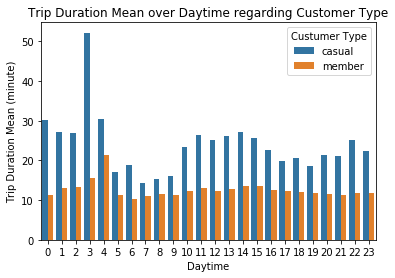

In [68]:
df_sub = df[['daytime', 'trip_duration', 'member_casual']].groupby(['daytime', 'member_casual']).mean();
df_sub = df_sub.add_suffix('_mean').reset_index();
sb.barplot(data = df_sub, x='daytime', y='trip_duration_mean', hue='member_casual');
plt.legend(title='Custumer Type');
plt.xlabel('Daytime');
plt.ylabel('Trip Duration Mean (minute)');
plt.title('Trip Duration Mean over Daytime regarding Customer Type');


The trip duration mean is larger for casual type all over the day

Trip duration, member_casual and weekday

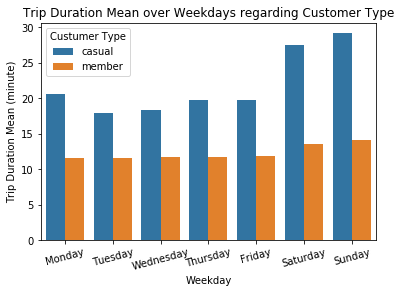

In [69]:
df_sub = df[['weekday', 'trip_duration', 'member_casual']].groupby(['weekday', 'member_casual']).mean()
df_sub = df_sub.add_suffix('_mean').reset_index()
sb.barplot(data = df_sub, x='weekday', y='trip_duration_mean', hue='member_casual')
plt.xticks(rotation=15)
plt.legend(title='Custumer Type');
plt.xlabel('Weekday');
plt.ylabel('Trip Duration Mean (minute)');
plt.title('Trip Duration Mean over Weekdays regarding Customer Type');


Trip duration, member_casual and month

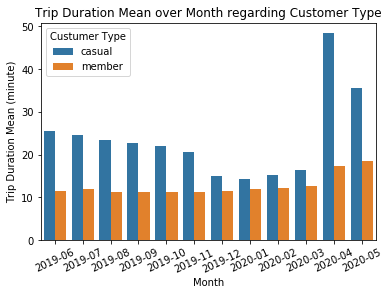

In [70]:
df_sub = df[['month', 'trip_duration', 'member_casual']].groupby(['month', 'member_casual']).mean()
df_sub = df_sub.add_suffix('_mean').reset_index()
sb.barplot(data = df_sub, x='month', y='trip_duration_mean', hue='member_casual')
plt.xticks(rotation=25)
plt.legend(title='Custumer Type');
plt.xlabel('Month');
plt.ylabel('Trip Duration Mean (minute)');
plt.title('Trip Duration Mean over Month regarding Customer Type');

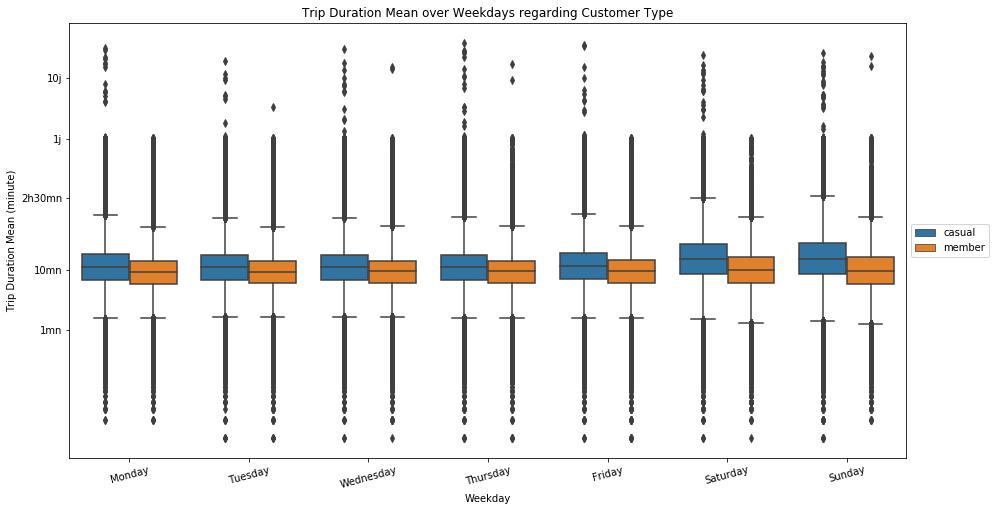

In [71]:
plt.figure(figsize=(15,8));

sb.boxplot(data=df, x='weekday', y='trip_duration_exp', hue='member_casual');
# set y ticks and labels
duration_yticks();
plt.xticks(rotation = 15);
plt.legend(loc=6, bbox_to_anchor = (1.0,0.5));
plt.xlabel('Weekday');
plt.ylabel('Trip Duration Mean (minute)');
plt.title('Trip Duration Mean over Weekdays regarding Customer Type');


The trip duration is larger the weekend

The trip duration is larger the month

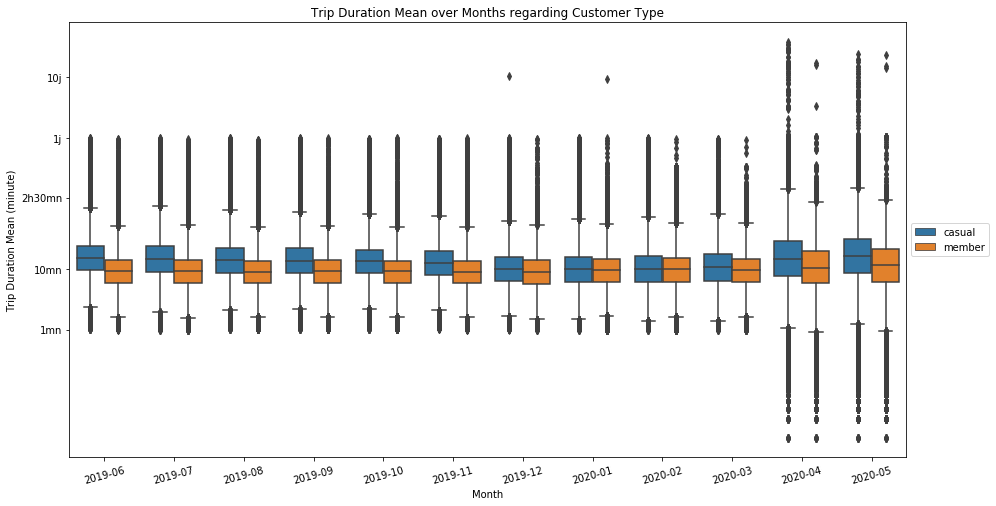

In [72]:
plt.figure(figsize=(15,8));

sb.boxplot(data=df, x='month', y='trip_duration_exp', hue='member_casual');
# set y ticks and labels
duration_yticks();
plt.xticks(rotation = 15);
plt.legend(loc=6, bbox_to_anchor = (1.0,0.5));
plt.xlabel('Month');
plt.ylabel('Trip Duration Mean (minute)');
plt.title('Trip Duration Mean over Months regarding Customer Type');

The trip duration is more susceptible to long the two last months

### Relationship Observation

> Trip for casual is more susceptible to be longer than member trip
> The weekend and the two last month are more susceptible to be long

### Interesting Observation

> with the Corona virus pandemic (the two last months) trips are susceptible to be longer